<h1 
  id = "title"; 
  style="color:#4974a5; border-bottom: 3px solid #4974a5;"
>
  Analyzing Crime in LA

</h1>  

## 🌇🚔 Background  
#### By [DataCamp.com](https://app.datacamp.com). 


![Los Angeles skyline](../images/la_skyline.jpg)


Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs!

However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing their crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

You are free to use any methodologies that you like in order to produce your insights. 

[Competition overview page.](https://app.datacamp.com/learn/competitions/analyzing-crime-la?activeTab=competition-overview)





<h2 
  id= "";
  style="color:#8fca6b; border-bottom: 1px solid #207d06;"
>
</h2>

<p 
  id = "by-jamie-dormaar"; 
  style="
    font-family:JetBrains Mono;
    letter-spacing: 1px;
    color:#8fca6b;
    font-size:110%;
    text-align:left;"
>
  DataCamp submission by Jamie Dormaar
</p>  

## ✅ Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

<h2 id= "TOC"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">TABLE OF CONTENTS</h2>


- [THE DATA](#the-data)
- [EXPLORATION](#exploration)
- [DATA CLEANING](#data-cleaning)
    - [DATA FORMAT CONSISTENCY](#data-format-consistency)
    - [MISSING VALUES](#missing-values)

<!--
- [PREPROCESS DATA](#preprocess-data)
- [DATA CLEANING](#revise-data-cleaning)
    - [TARGET VARIABLE REFINEMENT](#target-variable-refinement)
    - [MERGING DATA SOURCES](#merging-data-sources)
        - [CLASSIFICATION OF PROTEIN FAMILIES (P-FAM)](#pfam)
        - [KAGGLE DATASET: STRUCTURAL PROTEIN SEQUENCES (with protein crystallization and xray crystallography specifications)](#xray)
- [SELECTING A TARGET VARIABLE](#select-target-variable)
- [FEATURE ENGINEERING](#feature-engineering)
    - [NLP REPRESENTATIONS](#nlp-representations)
        - [N-GRAMS](#n-grams)
    - [AMINO ACID PHYSICAL PROPERTIES](#aa-physical-properties)
        - [NET PROTEIN ACIDITY](#acidity)
        - [HYDROPATHY INDEX](#hydropathy-index)
        - [NET PROTEIN CHARGE](#net_charge)
- [MODELING](#modeling)
    - [SPLITTING DATA](#splitting-data)
    - [MODEL TRAINING](#model-training)
    - [MODEL EVALUATION](#model-evaluation)
    - [TUNE HYPERPARAMETERS](#tune-hyperparameters)
- [DEPLOYMENT](#deployment)
- [DISCUSSION](#discussion)
- [REFERENCES](#references)
    - [DATA SOURCES](#data-sources)
    - [TEXT REFERENCES](#text-references)
--->



<!--
Doc Headers:
<h4 id= ""; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;"></h4>
<h2 id= "the-data"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">THE DATA</h2>
<h2 id= "exploration"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">EXPLORATION</h2>
<h2 id= "data-cleaning"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DATA CLEANING</h2>
<h3 id= "data-format-consistency"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">DATA FORMAT CONSISTENCY</h3>
<h3 id= "missing-values"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MISSING VALUES</h3>


<h2 id= "preprocess-data"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">PREPROCESS DATA</h2>
<h3 id= "target-variable-refinement"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">TARGET VARIABLE REFINEMENT</h3>
<h3 id= "merging-data-sources"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MERGING DATA SOURCES</h3>
<h4 id= "pfam"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">CLASSIFICATION OF PROTEIN FAMILIES (P-FAM)</h4>
<h4 id= "xray"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">KAGGLE DATASET: STRUCTURAL PROTEIN SEQUENCES (with protein crystallization and xray crystallography specifications)</h4>
<h3 id= "select-target-variable"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">SELECTING A TARGET VARIABLE</h3>
<h2 id= "feature-engineering"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">FEATURE ENGINEERING</h2>
<h3 id= "nlp-representations"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">NLP REPRESENTATIONS</h3>
<h4 id= "n-grams"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">N-GRAMS</h4>
<h4 id= "aa-physical-properties"; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">AMINO ACID PHYSICAL PROPERTIES</h4>
<h5 id= "acidity"; style="color:#ff7400; text-align:left; padding: 0px; border-bottom: 1px solid #ff7400;">NET PROTEIN ACIDITY</h5>
<h5 id= "hydropathy-index"; style="color:#ff7400; text-align:left; padding: 0px; border-bottom: 1px solid #ff7400;">HYDROPATHY INDEX</h5>
<h5 id= "net_charge"; style="color:#ff7400; text-align:left; padding: 0px; border-bottom: 1px solid #ff7400;">NET PROTEIN CHARGE</h5>
<h2 id= "modeling"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">MODELING</h2>
<h3 id= "splitting-data"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">SPLITTING DATA</h3>
<h3 id= "model-training"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MODEL TRAINING</h3>
<h3 id= "model-evaluation"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MODEL EVALUATION</h3>
<h2 id= "tune-hyperparameters"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">TUNE HYPERPARAMETERS</h2>
<h2 id= "deployment"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DEPLOYMENT</h2>
<h2 id= "discussion"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DISCUSSION</h2>
<h2 id= "references"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">REFERENCES</h2>
<h3 id= "data-sources"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">DATA SOURCES</h3>
<h3 id= "academic-journal-publications"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">ACADEMIC JOURNAL PUBLICATIONS</h3>
<h3 id= "text-references"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">TEXT REFERENCES</h3>
<h3 id= "online-publications"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">ONLINE PUBLICATIONS</h3>
<h3 id= "footnotes"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">FOOTNOTES</h3>
-->






<h2 id= "the-data"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">THE DATA</h2>

# The Data

They have provided you with a single dataset to use. A summary and preview is provided below.

The data is publicly available [here](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8).

## 👮‍♀️ crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'dr_no'` | Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits. |
| `'date_rptd'` | Date reported - MM/DD/YYYY. |
| `'date_occ'` | Date of occurrence - MM/DD/YYYY. |
| `'time_occ'` | In 24 hour military time. |
| `'area'` | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. |
| `'area_name'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'rpt_dist_no'` | A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74ab |
| `'crm_cd'` | Crime code for the offense committed. |
| `'crm_cd_desc'` | Definition of the crime. |
| `'vict_age'` | Victim Age (years) |
| `'vict_sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'vict_descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'premis_cd'` | Code for the type of structure, vehicle, or location where the crime took place. |
| `'premis_desc'` | Definition of the `'premis_cd'`. |
| `'weapon_used_cd'` | The type of weapon used in the crime. |
| `'weapon_desc'` | Description of the weapon used (if applicable). |
| `'status_desc'` | Crime status:<ul><li>Invest Cont</li><li>Adult Other</li><li>Adult Arrest</li><li>Juv Arrest</li><li>Juv Other</li><li>UNK</li> |
| `'crm_cd_1'` | Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. |
| `'crm_cd_2'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'crm_cd_3'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'crm_cd_4'` | May contain a code for an additional crime, less serious than Crime Code 1. |
| `'location'` | Street address of the crime. |
| `'cross_street'` | Cross Street of rounded Address |
| `'lat'` | Latitude of the crime location. |
| `'lon'` | Longitude of the crime location. |

In [293]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

from scipy import stats

# import warnings
# warnings.filterwarnings('ignore')

# import os
# import json
# import requests


In [294]:
session = 'eda'


In [295]:
crimes = pd.read_csv('../data/crimes.csv')
crimes.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,201223780,2020-11-02,11/02/2020 12:00:00 AM,1120,12,77th Street,1256,210,ROBBERY,65,...,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827
1,201911283,2020-06-23,06/23/2020 12:00:00 AM,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,...,NaN,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479
2,200806654,2020-02-28,02/28/2020 12:00:00 AM,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,...,NaN,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171
3,220912167,2022-08-03,07/26/2022 12:00:00 AM,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,...,NaN,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445
4,200817110,2020-12-02,11/27/2020 12:00:00 AM,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,...,NaN,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325


<h2 id= "exploration"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">EXPLORATION</h2>

In [296]:
crimes.shape


(400146, 25)

In [297]:
crimes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400146 entries, 0 to 400145
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           400146 non-null  int64  
 1   Date Rptd       400146 non-null  object 
 2   DATE OCC        400146 non-null  object 
 3   TIME OCC        400146 non-null  int64  
 4   AREA            400146 non-null  int64  
 5   AREA NAME       400146 non-null  object 
 6   Rpt Dist No     400146 non-null  int64  
 7   Crm Cd          400146 non-null  int64  
 8   Crm Cd Desc     400146 non-null  object 
 9   Vict Age        400146 non-null  int64  
 10  Vict Sex        346271 non-null  object 
 11  Vict Descent    346268 non-null  object 
 12  Premis Cd       400140 non-null  float64
 13  Premis Desc     399910 non-null  object 
 14  Weapon Used Cd  136027 non-null  float64
 15  Weapon Desc     136027 non-null  object 
 16  Status Desc     400146 non-null  object 
 17  Crm Cd 1  

In [298]:
# Save a working copy
df = crimes.copy()


<h2 id= "data-cleaning"; style="color:#207d06; text-align:left; padding: 0px; border-bottom: 3px solid #207d06;">DATA CLEANING</h2>

<h3 id= "data-format-consistency"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">DATA FORMAT CONSISTENCY</h3>

<h4 id= ""; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">COLUMN HEADINGS</h4>

The column titles are currently a mix of upper and lower case. for consistency they will all be reformatted to snake case:

In [299]:
# create list of column titles
cols = crimes.columns.tolist()

# change the spaces to underscores
cols = [x.replace(' ', '_') for x in cols]

# convert all to lower case
cols = [x.lower() for x in cols]

# confirm results by printing a few,
cols[:4]


['dr_no', 'date_rptd', 'date_occ', 'time_occ']

In [300]:
# Create a dictionary keying the old headings to the new:
old_cols = df.columns.tolist()
col_map = dict(zip(old_cols, cols))

col_map


{'DR_NO': 'dr_no',
 'Date Rptd': 'date_rptd',
 'DATE OCC': 'date_occ',
 'TIME OCC': 'time_occ',
 'AREA': 'area',
 'AREA NAME': 'area_name',
 'Rpt Dist No': 'rpt_dist_no',
 'Crm Cd': 'crm_cd',
 'Crm Cd Desc': 'crm_cd_desc',
 'Vict Age': 'vict_age',
 'Vict Sex': 'vict_sex',
 'Vict Descent': 'vict_descent',
 'Premis Cd': 'premis_cd',
 'Premis Desc': 'premis_desc',
 'Weapon Used Cd': 'weapon_used_cd',
 'Weapon Desc': 'weapon_desc',
 'Status Desc': 'status_desc',
 'Crm Cd 1': 'crm_cd_1',
 'Crm Cd 2': 'crm_cd_2',
 'Crm Cd 3': 'crm_cd_3',
 'Crm Cd 4': 'crm_cd_4',
 'LOCATION': 'location',
 'Cross Street': 'cross_street',
 'LAT': 'lat',
 'LON': 'lon'}

In [301]:
# Rename the columns in the table.
df = df.rename(columns=col_map)
df.head()


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,...,weapon_desc,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,201223780,2020-11-02,11/02/2020 12:00:00 AM,1120,12,77th Street,1256,210,ROBBERY,65,...,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827
1,201911283,2020-06-23,06/23/2020 12:00:00 AM,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,...,NaN,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479
2,200806654,2020-02-28,02/28/2020 12:00:00 AM,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,...,NaN,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171
3,220912167,2022-08-03,07/26/2022 12:00:00 AM,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,...,NaN,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445
4,200817110,2020-12-02,11/27/2020 12:00:00 AM,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,...,NaN,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325


<h4 id= ""; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">DATE FORMAT</h4>


In [302]:
df[['date_rptd',	'date_occ']].head(10)


,date_rptd,date_occ
0,2020-11-02,11/02/2020 12:00:00 AM
1,2020-06-23,06/23/2020 12:00:00 AM
2,2020-02-28,02/28/2020 12:00:00 AM
3,2022-08-03,07/26/2022 12:00:00 AM
4,2020-12-02,11/27/2020 12:00:00 AM
5,2020-02-27,02/25/2020 12:00:00 AM
6,2020-12-10,05/12/2020 12:00:00 AM
7,2020-03-05,03/05/2020 12:00:00 AM
8,2022-04-12,04/12/2022 12:00:00 AM
9,2023-03-30,03/30/2023 12:00:00 AM


Above I can already see that we not only have two different date formats, but that for some reason all of the `date_occ` values have ` 12:00:00 AM` at the end of each recorded date.  This is clearly an inaccurate time stamp we should clean up.

_(Short of the generously estimated 4.6*10^-11 probability that __coincidentally__ every crime recorded in LA over the past three years, actually occurred precisely at 12:00:00 AM, that is.)_.

Remove the junk data from `date_occ` values:

In [303]:
df['date_occ'] = df['date_occ'].apply(lambda x: x[:10])
df[['date_rptd',	'date_occ']].head(3)


,date_rptd,date_occ
0,2020-11-02,11/02/2020
1,2020-06-23,06/23/2020
2,2020-02-28,02/28/2020


Convert both `date_occ`, and `date_occ` column dates to datetime objects:

In [304]:
print(f"date_rptd dtype :{type(df['date_rptd'][0])}")
print(f"date_occ dtype :{type(df['date_occ'][0])}")


date_rptd dtype :<class 'str'>
date_occ dtype :<class 'str'>


In [305]:
# datetime conversion from date_rptd string formatted "%Y-%m-%d"
df['date_rptd'] = df['date_rptd'].apply(lambda x: dt.strptime(x, "%Y-%m-%d"))

# datetime conversion from date_occ string formatted "%m/%d/%Y"
df['date_occ'] = df['date_occ'].apply(lambda x: dt.strptime(x, "%m/%d/%Y"))

df[['date_rptd',	'date_occ']].head(3)


,date_rptd,date_occ
0,2020-11-02,2020-11-02
1,2020-06-23,2020-06-23
2,2020-02-28,2020-02-28


In [306]:
print(f"date_rptd dtype :{type(df['date_rptd'][0])}")
print(f"date_occ dtype :{type(df['date_occ'][0])}")


date_rptd dtype :<class 'pandas._libs.tslibs.timestamps.Timestamp'>
date_occ dtype :<class 'pandas._libs.tslibs.timestamps.Timestamp'>


<h4 id= ""; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">TIME FORMAT</h4>

In [307]:
# Check on the date and time dtypes and formats:
df[['date_rptd', 'date_occ', 'time_occ']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400146 entries, 0 to 400145
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date_rptd  400146 non-null  datetime64[ns]
 1   date_occ   400146 non-null  datetime64[ns]
 2   time_occ   400146 non-null  int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 9.2 MB


In [308]:
df['time_occ'].head()


0    1120
1     315
2    1545
3    1730
4    1500
Name: time_occ, dtype: int64

Change the 24 hour time format from int64 for better chronological visualizations analyses later:

In [309]:
# Format time values with leading zeros, so the datetime function can understand them.
df['time_occ'] = df['time_occ'].apply(lambda x: f"{x:04d}")
df['time_occ'].head()


0    1120
1    0315
2    1545
3    1730
4    1500
Name: time_occ, dtype: object

In [310]:
# Convert time values to datetime objects
df['time_occ'] = df['time_occ'].apply(lambda x: pd.to_datetime(str(x), format='%H%M').time())
df['time_occ'].head()


In [ ]:
df['time_occ'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 400146 entries, 0 to 400145
Series name: time_occ
Non-Null Count   Dtype 
--------------   ----- 
400146 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


<h3 id= "missing-values"; style="color:#8fca6b; text-align:left; padding: 0px; border-bottom: 2px solid #8fca6b;">MISSING VALUES</h3>

In [ ]:
# Quantize missing values:
df.isna().sum()


dr_no                  0
date_rptd              0
date_occ               0
time_occ               0
area                   0
area_name              0
rpt_dist_no            0
crm_cd                 0
crm_cd_desc            0
vict_age               0
vict_sex           53875
vict_descent       53878
premis_cd              6
premis_desc          236
weapon_used_cd    264119
weapon_desc       264119
status_desc            0
crm_cd_1               6
crm_cd_2          372025
crm_cd_3          399348
crm_cd_4          400146
location               0
cross_street      335564
lat                    0
lon                    0
dtype: int64

crm_cd_4 is a completely empty column, so there's no point in keeping it

In [ ]:
df.drop(['crm_cd_4'], axis=1, inplace=True)


In [ ]:
# Unique Values:
df.nunique()


dr_no             400146
date_rptd           1280
date_occ            1280
time_occ            1439
area                  21
area_name             21
rpt_dist_no         1171
crm_cd               112
crm_cd_desc          112
vict_age             102
vict_sex               4
vict_descent          20
premis_cd            305
premis_desc          302
weapon_used_cd        77
weapon_desc           77
status_desc            6
crm_cd_1             119
crm_cd_2             102
crm_cd_3              27
location           53316
cross_street        7253
lat                 5228
lon                 4891
dtype: int64

Worth noting here that there are no duplicate rows here since the Division of Records Numbers which are the official file numbers 'dr_no' are all unique.

<h4 id= ""; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">STATUS DESCRIPTION</h4>

In [ ]:
# Not many status_desc value types, lets check types and frequencies:
df['status_desc'].value_counts()


Invest Cont     322960
Adult Other      41274
Adult Arrest     34125
Juv Arrest        1192
Juv Other          593
UNK                  2
Name: status_desc, dtype: int64

<h4 id= ""; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">LATITUDE AND LONGITUDE VALUES</h4>

Some of the lat and long values are zeros:

In [ ]:
# df[df['lat'] ==0][['lat', 'lon']]
df_ll_nulls = df[df['lat'] ==0][['area', 'rpt_dist_no', 'location', 'premis_cd', 'premis_desc', 'lat', 'lon']].copy()
df_ll_complete = df[df['lat'] !=0][['area', 'rpt_dist_no', 'location', 'premis_cd', 'premis_desc', 'lat', 'lon']].copy()

print(f'Sum total of missing latitudes: {df_ll_nulls.shape[0]}\n')

print('df_ll_nulls.nunique()\n-------------------')
display(df_ll_nulls.nunique())

df_ll_nulls.head()


Sum total of missing latitudes: 1222

df_ll_nulls.nunique()
-------------------


area             21
rpt_dist_no     579
location       1036
premis_cd        92
premis_desc      92
lat               1
lon               1
dtype: int64

,area,rpt_dist_no,location,premis_cd,premis_desc,lat,lon
120,6,639,5400 HOLLYWOOD BL,203.0,OTHER BUSINESS,0.0,0.0
297,6,636,SUNSET,101.0,STREET,0.0,0.0
542,6,659,1300 N HARVARD BL,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0.0,0.0
805,6,639,HOLLYWOOD,102.0,SIDEWALK,0.0,0.0
892,19,1998,7800 VAN NUYS BL,101.0,STREET,0.0,0.0


In [ ]:
df_ll_complete[['area', 'rpt_dist_no', 'lat']].groupby(['area', 'rpt_dist_no']).agg(['min', 'max', 'mean']).head(3)


lat                    
                      min      max       mean
area rpt_dist_no                             
1    101          34.0646  34.0737  34.067726
     105          34.0668  34.0736  34.070898
     109          34.0717  34.0761  34.074850

Removing the lat values = to 0 for unskewed mean calculations

In [ ]:
df_ll_complete[['area', 'rpt_dist_no', 'lat']].groupby(['area', 'rpt_dist_no']).agg(['min', 'max', 'mean']).tail(3)


lat                    
                      min      max       mean
area rpt_dist_no                             
21   2196         34.1449  34.1587  34.152467
     2197         34.1474  34.1632  34.155694
     2198         34.1438  34.1492  34.146836

by the above head and tail prints, we can see that the `rpt_dist_no` values are unique to each `area` and are identified by the leading numbers.  Using the unique `rpt_dist_no` as a key, I can build a dictionary for the mean values we can impute the missing `lat` and `lon` values with higher accuracy.

Create a dictionary to key rpt_dist_no to mean lat and long:

In [ ]:
# Create a dictionary to key rpt_dist_no to mean lat:
lat_impute_dict = df_ll_complete[['rpt_dist_no', 'lat']].groupby(['rpt_dist_no']).agg(['mean']).round(4).to_dict()
lon_impute_dict = df_ll_complete[['rpt_dist_no', 'lon']].groupby(['rpt_dist_no']).agg(['mean']).round(4).to_dict()

#The code above creates a nested dictionary, so to extract sut the dictionary we want:
lat_impute_dict = lat_impute_dict[('lat', 'mean')]
lon_impute_dict = lon_impute_dict[('lon', 'mean')]

# Confirm dictionary
print(lat_impute_dict.keys())
lat_impute_dict[101]


dict_keys([101, 105, 109, 111, 112, 118, 119, 121, 122, 123, 124, 127, 128, 129, 131, 132, 133, 134, 135, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 171, 174, 176, 181, 182, 185, 191, 192, 195, 201, 202, 203, 204, 205, 211, 212, 213, 215, 216, 217, 218, 219, 221, 231, 233, 234, 235, 236, 237, 238, 239, 241, 245, 246, 247, 248, 249, 251, 256, 257, 261, 265, 266, 267, 269, 271, 275, 277, 279, 281, 285, 289, 291, 292, 295, 299, 301, 303, 305, 307, 308, 309, 311, 312, 313, 314, 315, 316, 317, 318, 319, 321, 325, 326, 327, 328, 329, 331, 332, 333, 334, 335, 336, 337, 338, 341, 343, 351, 353, 354, 355, 356, 357, 358, 359, 361, 362, 363, 373, 374, 375, 376, 377, 378, 379, 391, 392, 393, 394, 395, 396, 397, 398, 399, 401, 402, 403, 404, 405, 406, 407, 408, 409, 411, 412, 413, 414, 415, 416, 417, 418, 421, 422, 423, 424, 426, 427, 428, 429, 437, 438, 439, 441, 442, 443, 445, 448, 449, 451, 452, 453, 454, 455, 456,

34.0677

Test on the null table:

In [ ]:
df_ll_nulls.loc[df_ll_nulls['lat'] == 0, 'lat'] = df_ll_nulls['rpt_dist_no'].map(lat_impute_dict)
df_ll_nulls.loc[df_ll_nulls['lon'] == 0, 'lon'] = df_ll_nulls['rpt_dist_no'].map(lon_impute_dict)

df_ll_nulls.head(3)


,area,rpt_dist_no,location,premis_cd,premis_desc,lat,lon
120,6,639,5400 HOLLYWOOD BL,203.0,OTHER BUSINESS,34.1034,-118.3051
297,6,636,SUNSET,101.0,STREET,34.1027,-118.3331
542,6,659,1300 N HARVARD BL,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0969,-118.3044


Print the first few lat-lon values to ensure they're left unchanged:

In [ ]:
df[['lat', 'lon']].head(3)


,lat,lon
0,33.9737,-118.2827
1,34.2467,-118.4479
2,34.0463,-118.4171


In [ ]:
# Impute values for 'lat' and 'lon' columns where they are 0
df.loc[df['lat'] == 0, 'lat'] = df['rpt_dist_no'].map(lat_impute_dict)
df.loc[df['lon'] == 0, 'lon'] = df['rpt_dist_no'].map(lon_impute_dict)

# Confirm initial lat-lon values remain unchanged
df[['lat', 'lon']].head(3)


,lat,lon
0,33.9737,-118.2827
1,34.2467,-118.4479
2,34.0463,-118.4171


In [ ]:
# Confirm there are no more zero geolocation values in 'lat' or 'lon'
df[df['lat'] ==0][['lat', 'lon']].sum()


lat    0.0
lon    0.0
dtype: float64

In [ ]:
# Recheck for null values:
df[['lat', 'lon']].isna().sum()


lat    3
lon    3
dtype: int64

That nearly fixed all the records.  These 3 most likely had `rpt_dist_no` values which were not represented in the remaining complete record values, and were therefore absent from the dictionary.  I'll impute the remaining 3 with less regionally specific averages using the 21 `area` codes to approximate the relevant community police stations instead:

In [ ]:
# Create a dictionary to key area to mean lat:
area_lat = df_ll_complete[['area', 'lat']].groupby(['area']).agg(['mean']).round(4).to_dict()
area_lat = area_lat[('lat', 'mean')]

# Create a dictionary to key area to mean lon:
area_lon = df_ll_complete[['area', 'lon']].groupby(['area']).agg(['mean']).round(4).to_dict()
area_lon = area_lon[('lon', 'mean')]

# Impute the remaining 3 changes:
df.loc[df['lat'].isna(), 'lat'] = df['area'].map(area_lat)
df.loc[df['lon'].isna(), 'lon'] = df['area'].map(area_lon)


In [ ]:
# Check again for nulls:
df[['lat', 'lon']].isna().sum()


lat    0
lon    0
dtype: int64

<h4 id= ""; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">VICTIM DETAILS</h4>

In [ ]:
df['vict_age'].describe()


count    400146.000000
mean         30.134356
std          21.856693
min          -2.000000
25%           4.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: vict_age, dtype: float64

In [ ]:
df[['vict_age', 'dr_no']].groupby(['vict_age']).agg(['count']).head()


,dr_no
,count
vict_age,
-2,2
-1,30
0,99828
2,60
3,87


In [ ]:
df[['vict_age', 'dr_no']].groupby(['vict_age']).agg(['count']).tail()


,dr_no
,count
vict_age,
96,44
97,29
98,35
99,155
120,1


Interesting.  I suspect the nearly 100,000 `0`s are the null or missing values, but I wonder how `-1` or `-2` values happened.  Especially the `-1` 30 times.  

Lets take a closer look:

In [ ]:
neg_2 = df[df['vict_age']== -2].copy()
neg_2[[
   'dr_no',
   'area_name',
   'crm_cd',
   'crm_cd_desc',
   'vict_age',
   'vict_sex',
   'vict_descent',
   'premis_desc',
   'status_desc'
  ]]


,dr_no,area_name,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,status_desc
138716,232104876,Topanga,354,THEFT OF IDENTITY,-2,M,W,OTHER BUSINESS,Invest Cont
274313,231707697,Devonshire,354,THEFT OF IDENTITY,-2,X,X,OTHER BUSINESS,Invest Cont


In [ ]:
neg_1 = df[df['vict_age']== -1].copy()

# check for correlated anomalies in other data columns?
neg_1[[
   'rpt_dist_no',
   'crm_cd',
   'vict_sex',
   'vict_descent',
   'premis_desc',
   'status_desc',
  ]].nunique()


rpt_dist_no     28
crm_cd          13
vict_sex         3
vict_descent     5
premis_desc     12
status_desc      2
dtype: int64

In [ ]:
neg_1[[
   'rpt_dist_no',
   'crm_cd_desc',
   'vict_sex',
   'vict_descent',
   'premis_desc',
   'status_desc'
  ]].head()


,rpt_dist_no,crm_cd_desc,vict_sex,vict_descent,premis_desc,status_desc
5925,2156,THEFT OF IDENTITY,M,W,STREET,Invest Cont
12528,162,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",X,X,OTHER BUSINESS,Invest Cont
16983,939,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",F,W,HIGH SCHOOL,Invest Cont
46882,1541,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",F,O,DRIVEWAY,Invest Cont
65281,2033,SHOPLIFTING - PETTY THEFT ($950 & UNDER),X,X,CELL PHONE STORE,Invest Cont


In [ ]:
neg_1['crm_cd_desc'].value_counts()


THEFT OF IDENTITY                                           6
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                  5
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     3
THEFT PLAIN - PETTY ($950 & UNDER)                          3
BURGLARY                                                    3
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    2
DOCUMENT FORGERY / STOLEN FELONY                            2
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    1
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    1
TRESPASSING                                                 1
BRANDISH WEAPON                                             1
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         1
BUNCO, GRAND THEFT                                          1
Name: crm_cd_desc, dtype: int64

I don't see any obvious patterns to the `neg_1` data subset, and `neg_2` is too small of a subset to speculate so I will exclude these data points for now, and may revisit again later:

In [ ]:
age_na = df[df['vict_age']==0]
perc = ((age_na['vict_age'].value_counts()/df.shape[0])*100).round(1)

print(f'percentage of records without vict_age data: {float(perc)}%\n')


percentage of records without vict_age data: 24.9%



25% is a significant portion of the data, so instead of dropping all the records with confusing `vict_age` data values, I'll save a separate df called `df_vict` to use for victim analyses. This df will exclude ages `-2`, `-1`, `0`, and the single value of `120` discovered earlier.  There was a significant increase in the `vict_age` = `99` compared to that of `98`. More investigation should precede that sub-groups elimination however, since 99years is within the reach of the human lifespan and 155 records can hardly be called an outlier occurrence.

In [ ]:
df_vict = df.copy()

df_vict = df_vict[df_vict['vict_age']!= 0]
df_vict = df_vict[df_vict['vict_age']!= -1]
df_vict = df_vict[df_vict['vict_age']!= -2]

# recall the single vict_age record of 120years old
df_vict = df_vict[df_vict['vict_age']!= 120]

# Update df_eda.csv
df.to_csv(f'../data/df_{session}.csv')
# Save the vict_age focused data to its own file for now as df_vict_eda.csv
df_vict.to_csv(f'../data/df_vict_{session}.csv', index=False)

df_vict.shape


(300285, 24)

In [ ]:
df_vict['vict_age'].describe()


count    300285.000000
mean         40.155372
std          15.301738
min           2.000000
25%          28.000000
50%          37.000000
75%          50.000000
max          99.000000
Name: vict_age, dtype: float64

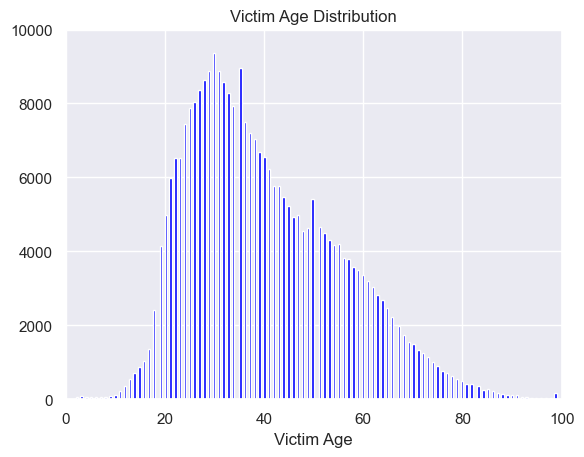

In [ ]:
sns.set_theme()
sns.set_context("notebook")
sns.color_palette("bright")
plt.hist(df_vict['vict_age'], bins=200, color='blue')


plt.xlabel('Victim Age')
plt.title('Victim Age Distribution')
plt.xlim(0, 100)
plt.ylim(0, 10000)

plt.savefig(f'../images/vict_age_distn_{session}.png')
plt.show()


<h4 id= ""; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">PREMISE</h4>


In [ ]:
premis = df[df['premis_cd'].notna()]
prem_desc_nulls = premis[premis['premis_desc'].isna()][['premis_cd', 'premis_desc']].copy()

display(prem_desc_nulls['premis_cd'].value_counts())
display(prem_desc_nulls.shape)

prem_desc_nulls.head()


418.0    160
256.0     67
972.0      3
Name: premis_cd, dtype: int64

(230, 2)

,premis_cd,premis_desc
2493,256.0,NaN
3658,418.0,NaN
5046,418.0,NaN
6505,418.0,NaN
6776,256.0,NaN


In [ ]:
# df[['premis_cd', 'premis_desc']].groupby('')


In [ ]:
x = df[df['premis_cd'] == (418.0 or 256.0 or 972.0)][['premis_cd', 'premis_desc']].copy()
x.isna().sum()


premis_cd        0
premis_desc    160
dtype: int64

<h4 id= ""; style="color:#c8d43e; text-align:left; padding: 0px; border-bottom: 1px solid #c8d43e;">WEAPONS</h4>

In [ ]:
df['weapon_desc'].value_counts()


STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    70535
UNKNOWN WEAPON/OTHER WEAPON                       14667
VERBAL THREAT                                     10382
HAND GUN                                           8834
SEMI-AUTOMATIC PISTOL                              3243
                                                  ...  
UZI SEMIAUTOMATIC ASSAULT RIFLE                       3
ANTIQUE FIREARM                                       3
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                   2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                   2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                      1
Name: weapon_desc, Length: 77, dtype: int64

In [ ]:
#dropping irrelevant columns for visuals
df_vis = df.drop(['area_name', 'location', 'cross_street'], axis=1)

df_vis.to_csv('../data/df_vis.csv', index=False)
df_vis.head(1)


,dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,vict_sex,...,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,lat,lon
0,201223780,2020-11-02,2020-11-02,11:20:00,12,1256,210,ROBBERY,65,F,...,102.0,SIDEWALK,204.0,FOLDING KNIFE,Invest Cont,210.0,NaN,NaN,33.9737,-118.2827


In [ ]:
df
['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no', 'crm_cd', 'crm_cd_desc', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'weapon_used_cd', 'weapon_desc', 'status_desc', 'crm_cd_1', 'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat', 'lon']


['dr_no',
 'date_rptd',
 'date_occ',
 'time_occ',
 'area',
 'area_name',
 'rpt_dist_no',
 'crm_cd',
 'crm_cd_desc',
 'vict_age',
 'vict_sex',
 'vict_descent',
 'premis_cd',
 'premis_desc',
 'weapon_used_cd',
 'weapon_desc',
 'status_desc',
 'crm_cd_1',
 'crm_cd_2',
 'crm_cd_3',
 'crm_cd_4',
 'location',
 'cross_street',
 'lat',
 'lon']

Does the time difference between date of crime reported and date the crime occurred display variances between geographic locations?

In [ ]:
'dr_no', 'date_rptd', 'date_occ'


('dr_no', 'date_rptd', 'date_occ')

does this time gap vary between crime types?

does this time gap vary between crime victim types?

does this time gap vary between crime types victim ages?

Does the crime rate and severity differ between the 21 LAPD community police stations?

Does the severity of crimes differ between the stations?

Can you generate a map with different sizes and different coloured bubbles for different crime types?

Is there a way to determine weather some crimes actually happen less frequently in certain areas, or rather might just be less frequently reported?

Are there any correlations between weapons used and victim type?

How about crime type? Geography?

Do the types of weapons used change over time?

Are weapons being used with increased or decreased frequency?